In [70]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from projLib.pair_constructor import PairConfiguration
from sklearn import metrics

In [10]:
config_2 = PairConfiguration(["/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/train.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/val.json", "/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/test.json"], "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json",k=20 ,n=[3])

/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/projLib/pair_constructor.py:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.valid_labels.loc[:,"content_combo"] = self.valid_labels["list_object"].apply(lambda x: frozenset(filter(lambda t: t in self.content_categories, x)))


In [3]:
results = pd.read_csv("results.csv")

In [19]:
pd.set_option('display.max_columns', None)  # or 1000
display(results.rename(lambda col: config_2.categories_decoder.get(int(col)) if col.isnumeric()  else "", axis=1))

,,,bowl,monkey,blanket,lion,horse,bicycle,elephant,pillow,cat,towel,cellular_telephone,book,truck,fish,bottle,ball,cup,dog,car,person
0,0,acc,0.998355,1.0,0.989309,1.0,0.999178,0.991776,1.0,0.990132,0.995066,0.993421,0.989309,0.999178,0.995066,1.0,0.987664,0.999178,0.986842,0.984375,0.993421,1.0
1,1,prec,1.000000,1.0,0.976608,0.0,1.000000,0.964286,1.0,0.968992,0.930233,0.995575,0.984925,1.000000,0.950000,1.0,0.993266,1.000000,0.987745,0.988024,0.971429,1.0
2,2,recall,0.971429,1.0,0.948864,0.0,0.900000,0.920455,1.0,0.984252,1.000000,0.969828,0.951456,0.994186,0.950000,1.0,0.957792,0.954545,0.973430,0.906593,0.971429,1.0
3,3,f1,0.985507,1.0,0.962536,0.0,0.947368,0.941860,1.0,0.976562,0.963855,0.982533,0.967901,0.997085,0.950000,1.0,0.975207,0.976744,0.980535,0.945559,0.971429,1.0
4,4,roc_auc,0.985714,1.0,0.972509,-1.0,0.950000,0.958897,1.0,0.987968,0.997359,0.984406,0.974243,0.997093,0.973702,1.0,0.977795,0.977273,0.983598,0.952330,0.983856,1.0


In [68]:
with open("raw_preds.json", "r") as f:
    raw_preds = json.load(f)

preds = list(zip(*list(raw_preds.values())))
predsums = []
for pred in preds:
    predsums.append(sum(pred))


In [74]:
with open("raw_labels.json", "r") as f:
    raw_labels = json.load(f)

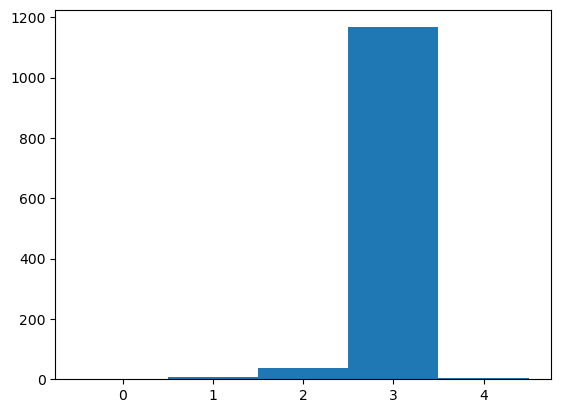

In [66]:
bins = np.arange(0, 5.5) - 0.5
fig, ax = plt.subplots()
_ = ax.hist(predsums, bins)
ax.set_xticks([0,1,2,3,4])

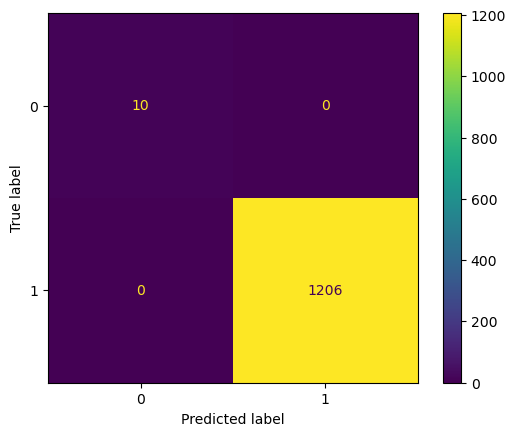

In [75]:
metrics.ConfusionMatrixDisplay.from_predictions(raw_preds["805.0"], raw_labels["805.0"])